# Breast Cancer: Malignant Or Benign
### Predict
Breast cancer cell classification using K-Nearest Neighbor classifier. Use the dataset of file wisc_bc_data.csv. Use the following settings to design the classifier:
-	Min-max feature normalization.
-	Out of 569 data samples use the 1 to 469 for creating training dataset. Use rest of the samples to estimate the accuracy of the classifier.
-	Calculate the accuracies for K = 9, 11, 13, 15, 17 and 19


In [1]:
import pandas as pd
df = pd.read_csv('wisc_bc_data.csv')

##  Exploratory data analysis
Printing first 5 rows of the train dataset.

In [2]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Data Dictionary
- radius_mean                569 non-null float64
- texture_mean               569 non-null float64
- perimeter_mean             569 non-null float64
- area_mean                  569 non-null float64
- smoothness_mean            569 non-null float64
- compactness_mean           569 non-null float64
- concavity_mean             569 non-null float64
- concave points_mean        569 non-null float64
- symmetry_mean              569 non-null float64
- fractal_dimension_mean     569 non-null float64
- radius_se                  569 non-null float64
- texture_se                 569 non-null float64
- perimeter_se               569 non-null float64
- area_se                    569 non-null float64
- smoothness_se              569 non-null float64
- compactness_se             569 non-null float64
- concavity_se               569 non-null float64
- concave points_se          569 non-null float64
- symmetry_se                569 non-null float64
- fractal_dimension_se       569 non-null float64
- radius_worst               569 non-null float64
- texture_worst              569 non-null float64
- perimeter_worst            569 non-null float64
- area_worst                 569 non-null float64
- smoothness_worst           569 non-null float64
- compactness_worst          569 non-null float64
- concavity_worst            569 non-null float64
- concave points_worst       569 non-null float64
- symmetry_worst             569 non-null float64
- fractal_dimension_worst    569 non-null float64

In [3]:
df.shape

(569, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
def diagnosis_mapping(diagnosis): 
    if diagnosis == 'M': 
        return 1
    else: 
        return 0
    
df['diagnosis'] = df['diagnosis'].apply(diagnosis_mapping) 

In [7]:
import numpy as np  
X = np.array(df.iloc[:, 1:]) 
y = np.array(df['diagnosis']) 

In [8]:
from sklearn import preprocessing
import numpy as np

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X)
print(X)

[[ 1.      17.99    10.38    ...  0.2654   0.4601   0.1189 ]
 [ 1.      20.57    17.77    ...  0.186    0.275    0.08902]
 [ 1.      19.69    21.25    ...  0.243    0.3613   0.08758]
 ...
 [ 1.      16.6     28.08    ...  0.1418   0.2218   0.0782 ]
 [ 1.      20.6     29.33    ...  0.265    0.4087   0.124  ]
 [ 0.       7.76    24.54    ...  0.       0.2871   0.07039]]


In [15]:
X_train, X_test = X[:469,:], X[469:,:]
y_train, y_test = y[:469], y[469:]

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 13) 
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [17]:
knn.score(X_test, y_test) 

0.94

In [23]:
neighbors = [] 
cv_scores = [] 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 
list_K = [9,11,13,15,17,19]
for k in list_K: 
    neighbors.append(k) 
    knn = KNeighborsClassifier(n_neighbors = k) 
    scores = cross_val_score(knn, X_train, y_train, cv = 10, scoring = 'accuracy') 
    cv_scores.append(scores.mean())
    print("Accuracy for ",k," nearest neighbours is: ",scores.mean())

Accuracy for  9  nearest neighbours is:  0.9275670675300647
Accuracy for  11  nearest neighbours is:  0.9339962997224791
Accuracy for  13  nearest neighbours is:  0.9382516188714154
Accuracy for  15  nearest neighbours is:  0.9361239592969474
Accuracy for  17  nearest neighbours is:  0.9339962997224791
Accuracy for  19  nearest neighbours is:  0.9276133209990748


The optimal number of neighbors is  13 


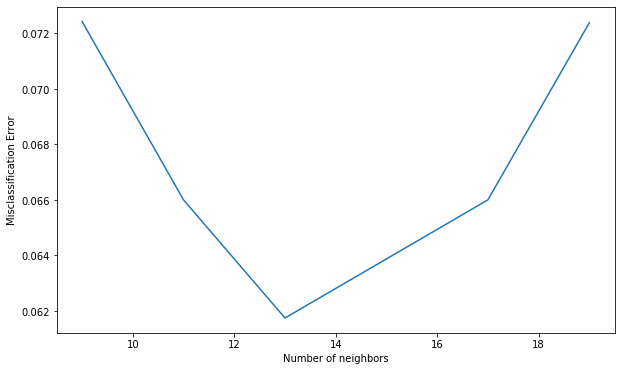

In [25]:
from matplotlib import pyplot as plt
MSE = [1-x for x in cv_scores] 
optimal_k = neighbors[MSE.index(min(MSE))] 
print('The optimal number of neighbors is % d ' % optimal_k)  
plt.figure(figsize = (10, 6)) 
plt.plot(neighbors, MSE) 
plt.xlabel('Number of neighbors') 
plt.ylabel('Misclassification Error') 
plt.show() 